 # Import Libraries

In [289]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#display configurations
pd.options.display.float_format = '{:}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#Import model libraries
from statsmodels.tsa.api import ARDL


#future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# READ DATA AND RELATIONSHIPS

In [290]:
# Read database
df = pd.read_csv('Acadia_MMX_Assignment.csv', sep=';', decimal=',')

# Identify index time

df = df.sort_values(['Year', 'Week'],ascending = [True, True])
df = df.reset_index(drop=True)

In [332]:
df.head(5)

,Year,Week,NewspaperSpends,Spends_Bing_Acquisition,Spends_Facebook_Acquisition,Spends_Facebook_Retention,Spends_Fynd_DV360_Acquisition,Spends_Fynd_DV360_Retention,Spends_Fynd_Experian_Acquisition,Spends_Fynd_Experian_Retention,Spends_Google_Acquisition,Spends_Google_Retention,Impressions_Bing_Acquisition,Impressions_Facebook_Acquisition,Impressions_Facebook_Retention,Impressions_Fynd_DV360_Acquisition,Impressions_Fynd_DV360_Retention,Impressions_Fynd_Experian_Acquisition,Impressions_Fynd_Experian_Retention,Impressions_Google_Acquisition,Impressions_Google_Retention,Clicks_Bing_Acquisition,Clicks_Facebook_Acquisition,Clicks_Facebook_Retention,Clicks_Fynd_DV360_Acquisition,Clicks_Fynd_DV360_Retention,Clicks_Fynd_Experian_Acquisition,Clicks_Fynd_Experian_Retention,Clicks_Google_Acquisition,Clicks_Google_Retention,Photography_Spends,Instore_Visuals_Spends,DM_Cost,Total_EM_Sends,Total_EM_Opens,Total_EM_Clicks,EM_Send_Cost,Sales
0,2018,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3069.666667,14662.44444,0.0,0,0,0,0.0,16746669.03
1,2018,50,646.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3069.666667,14662.44444,0.0,0,0,0,0.0,16531811.67
2,2018,51,12988.1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3069.666667,14662.44444,20536.31745,0,0,0,0.0,17262815.24
3,2018,52,29903.7211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3069.666667,14662.44444,77737.77967,0,0,0,0.0,18127847.78
4,2018,53,120780.6808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,3069.666667,14662.44444,179670.7966,3354577,235059,232150,1727.61,20765887.76


# DATA PRE-PROCESSING MODELING

***Data Estatistic Summary Inspection***

In [291]:
#Statistic summary 
df.describe()

#Variables Missing(Nulls) treatment & INSPECTION
# not missing values detected

,Year,Week,NewspaperSpends,Spends_Bing_Acquisition,Spends_Facebook_Acquisition,Spends_Facebook_Retention,Spends_Fynd_DV360_Acquisition,Spends_Fynd_DV360_Retention,Spends_Fynd_Experian_Acquisition,Spends_Fynd_Experian_Retention,Spends_Google_Acquisition,Spends_Google_Retention,Impressions_Bing_Acquisition,Impressions_Facebook_Acquisition,Impressions_Facebook_Retention,Impressions_Fynd_DV360_Acquisition,Impressions_Fynd_DV360_Retention,Impressions_Fynd_Experian_Acquisition,Impressions_Fynd_Experian_Retention,Impressions_Google_Acquisition,Impressions_Google_Retention,Clicks_Bing_Acquisition,Clicks_Facebook_Acquisition,Clicks_Facebook_Retention,Clicks_Fynd_DV360_Acquisition,Clicks_Fynd_DV360_Retention,Clicks_Fynd_Experian_Acquisition,Clicks_Fynd_Experian_Retention,Clicks_Google_Acquisition,Clicks_Google_Retention,Photography_Spends,Instore_Visuals_Spends,DM_Cost,Total_EM_Sends,Total_EM_Opens,Total_EM_Clicks,EM_Send_Cost,Sales
count,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
mean,2018.9056603773586,27.0,10442.384126415094,4902.611199999999,49530.71493675471,32193.338747823014,4613.935124918868,1896.2571322037734,264.72381475471695,757.545765090566,201598.32225283026,520.4722264150943,45797.301886792455,647048.0943396227,116024.3396226415,4960993.075471698,243604.4716981132,71306.32075471699,112339.24528301887,1792244.1698113207,1912.1698113207547,1839.9996226415094,18409.989245283017,2369.5607545660378,2267.4150943396226,221.50943396226415,33.509433962264154,63.924528301886795,14517.340188679245,86.26509433962265,3901.5283019811322,8290.207546547172,34555.471697981135,8351671.8301886795,585215.679245283,61131.3962264151,4301.1066037735845,9578285.126037735
std,0.2950978288503027,15.443445211480501,38033.53240724256,14088.857701800973,170129.7730881083,136671.00008273675,5086.470863529766,2663.918976529567,895.2630428095118,2044.3380149588545,880053.397221541,1947.4111377337836,46809.14566932115,475393.16902074544,200465.7802983173,6042804.239866037,311483.7362249249,236277.54788764627,230584.192355059,2201677.5682229022,4149.938978864857,1447.1929240522072,15651.266260555876,3943.191553716072,1854.840325223568,308.9155736444151,110.57656982337717,125.04458421154675,9433.881246404957,171.56714902763787,1371.459349102277,6050.374897914563,50331.70566806969,4129725.02006413,241436.91551750465,66390.19486900029,2126.804083338103,10516563.355641106
min,2018.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2512.25,2580.416667,0.0,0.0,0.0,0.0,0.0,0.0
25%,2019.0,14.0,0.0,735.4592,4425.960002,0.0,1726.38809,440.2605634,0.0,0.0,3731.1568,0.0,10015.0,188448.0,0.0,2182426.0,51647.0,0.0,0.0,281759.0,0.0,810.0,7673.0,0.0,1320.0,41.0,0.0,0.0,9760.0,0.0,3069.666667,3194.9,0.0,4905208.0,440960.0,40153.0,2526.2,0.0
50%,2019.0,27.0,0.0,1605.4304,9596.182399,0.0,3272.581951,925.6556708,0.0,0.0,10656.8112,0.0,36802.0,729695.0,0.0,4076014.0,184492.0,0.0,0.0,934286.0,0.0,1695.0,17910.0,0.0,1981.0,150.0,0.0,0.0,16064.0,0.0,3384.1,7002.233333,0.0,8090348.0,603935.0,47017.0,4166.54,5070279.02
75%,2019.0,40.0,0.0,3217.536,17084.32321,1485.400001,5027.414212,1877.051325,0.0,846.6815434,14523.7344,0.0,66547.0,975063.0,83188.0,5251098.0,268655.0,0.0,180047.0,2403557.0,0.0,2541.99,25857.0,1967.0,2839.0,255.0,0.0,100.0,19994.0,0.0,4029.5,14662.44444,61745.82408,12001412.0,766576.0,62428.0,6180.73,17254678.41
max,2019.0,53.0,244718.5824,78434.0,950268.0,727829.0,25398.34271,11312.01616,4569.277585,12838.75069,4715580.0,10403.0,168787.0,1953759.0,681110.0,35165189.0,1451854.0,1151387.0,1412817.0,7870945.0,14703.0,5014.0,71727.0,13423.0,9745.0,1602.0,545.0,743.0,34415.0,518.0,8569.722222,23564.77273,188229.0857,13468235.0,898896.0,425683.0,6936.12,40796707.47


In [333]:
df.shape[1]

38

# EXPLORATORY ANALYSIS

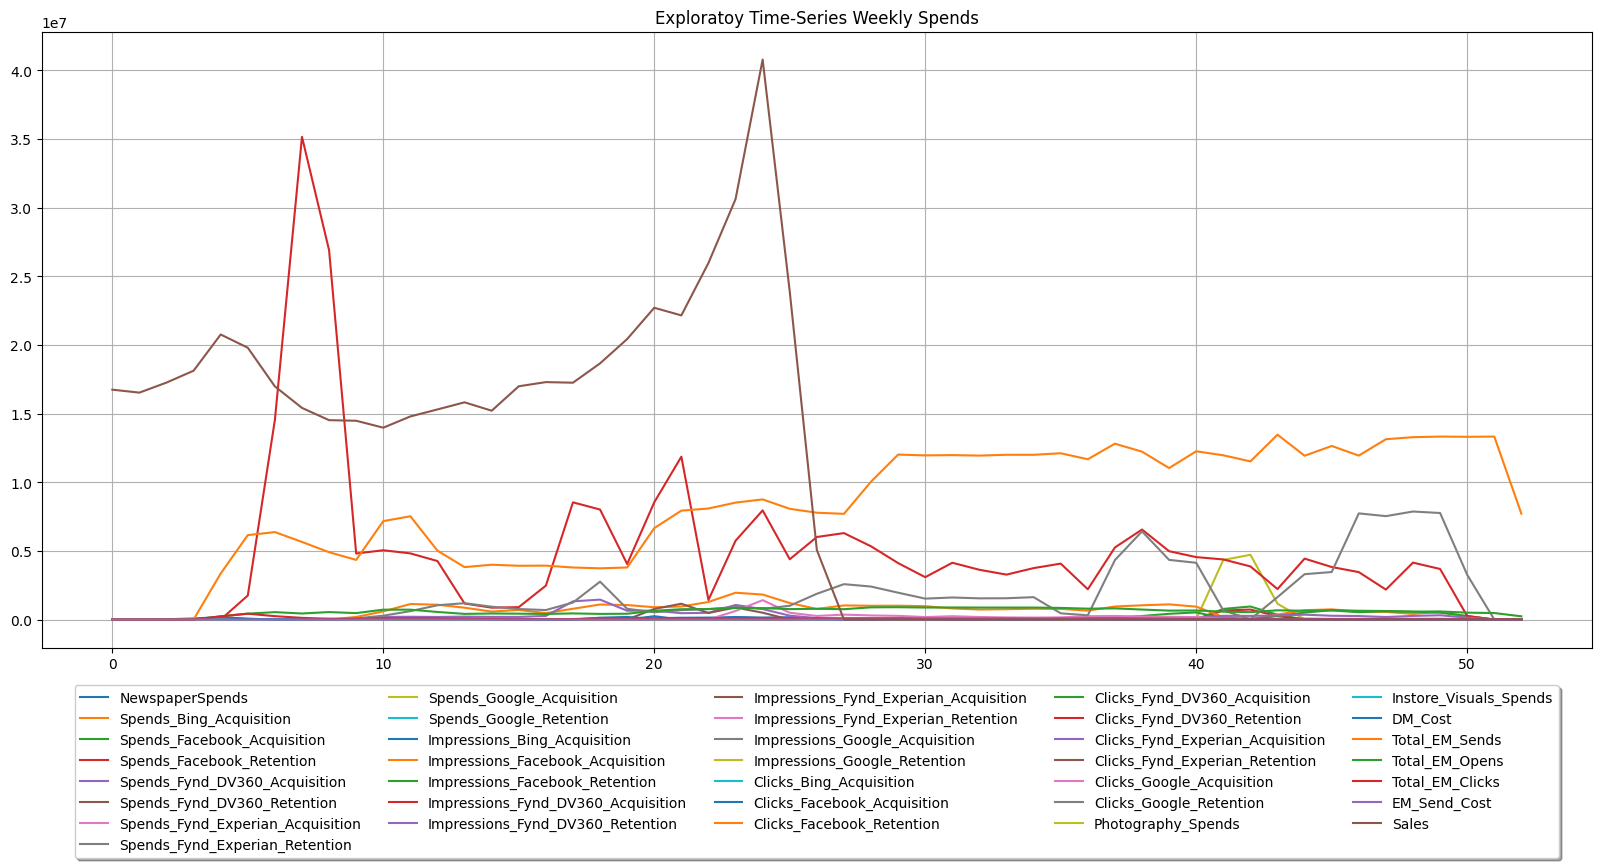

In [292]:
# Exploratory Analysis
ts_plot =df.drop(['Year', 'Week'], axis=1).plot(kind='line', title = 'Exploratoy Time-Series Weekly Spends', figsize=(20, 8))
ts_plot.grid()
# define the legend location
ts_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

***LOGARITMIC TRANSFORM ON FEATURES***

*To identify relationships*

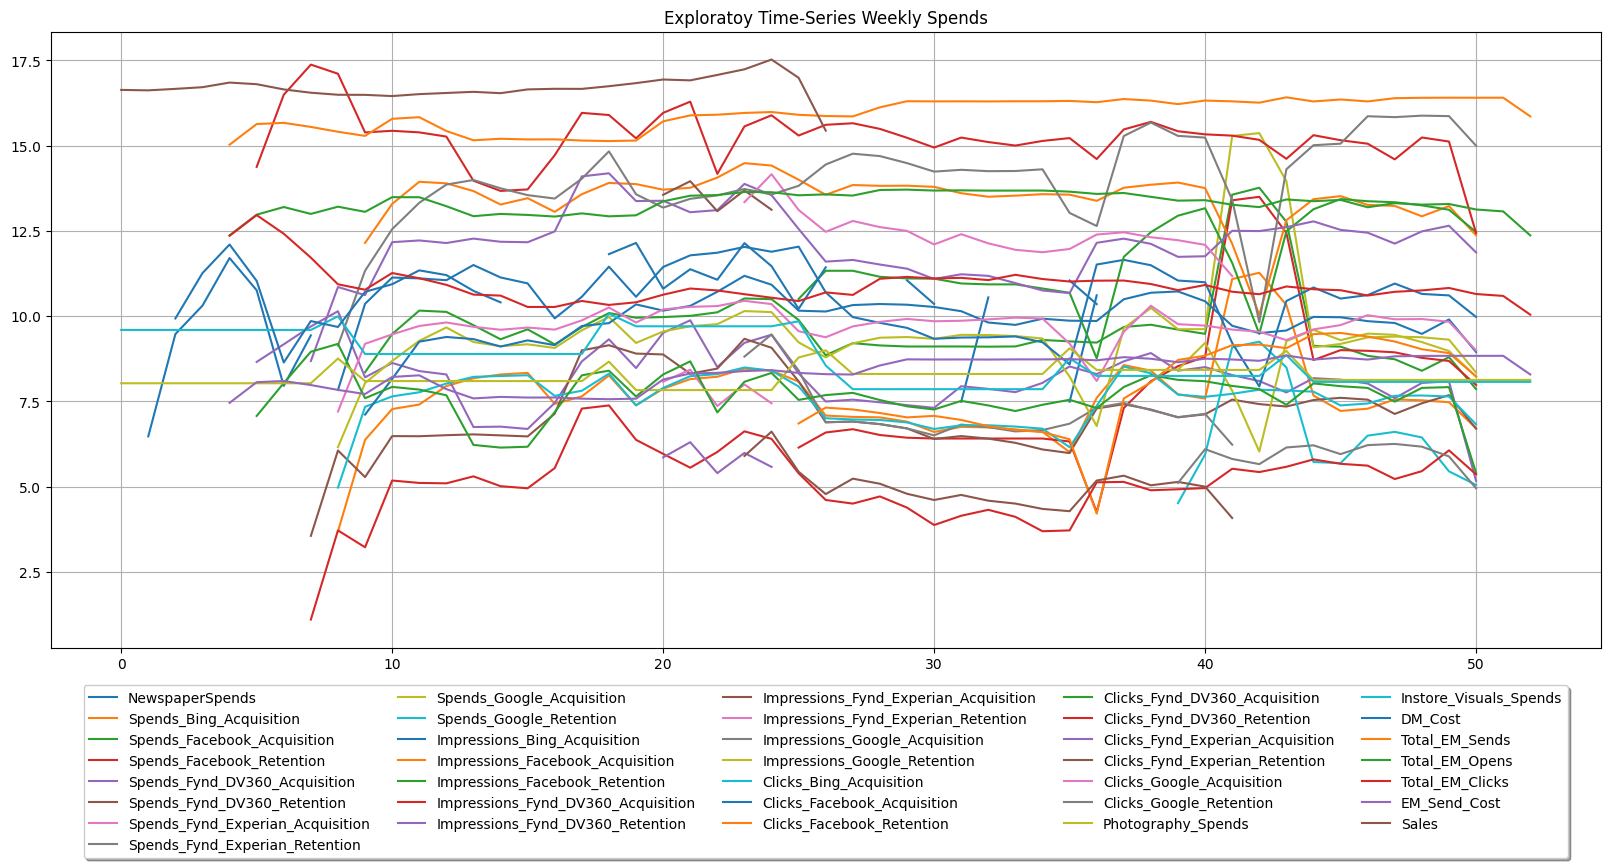

In [293]:
# Exploratory Analysis
ts_plot =np.log(df).drop(['Year', 'Week'], axis=1).plot(kind='line', title = 'Exploratoy Time-Series Weekly Spends', figsize=(20, 8))
ts_plot.grid()
# define the legend location
ts_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

***RELATIONSHIP ANALYSIS***

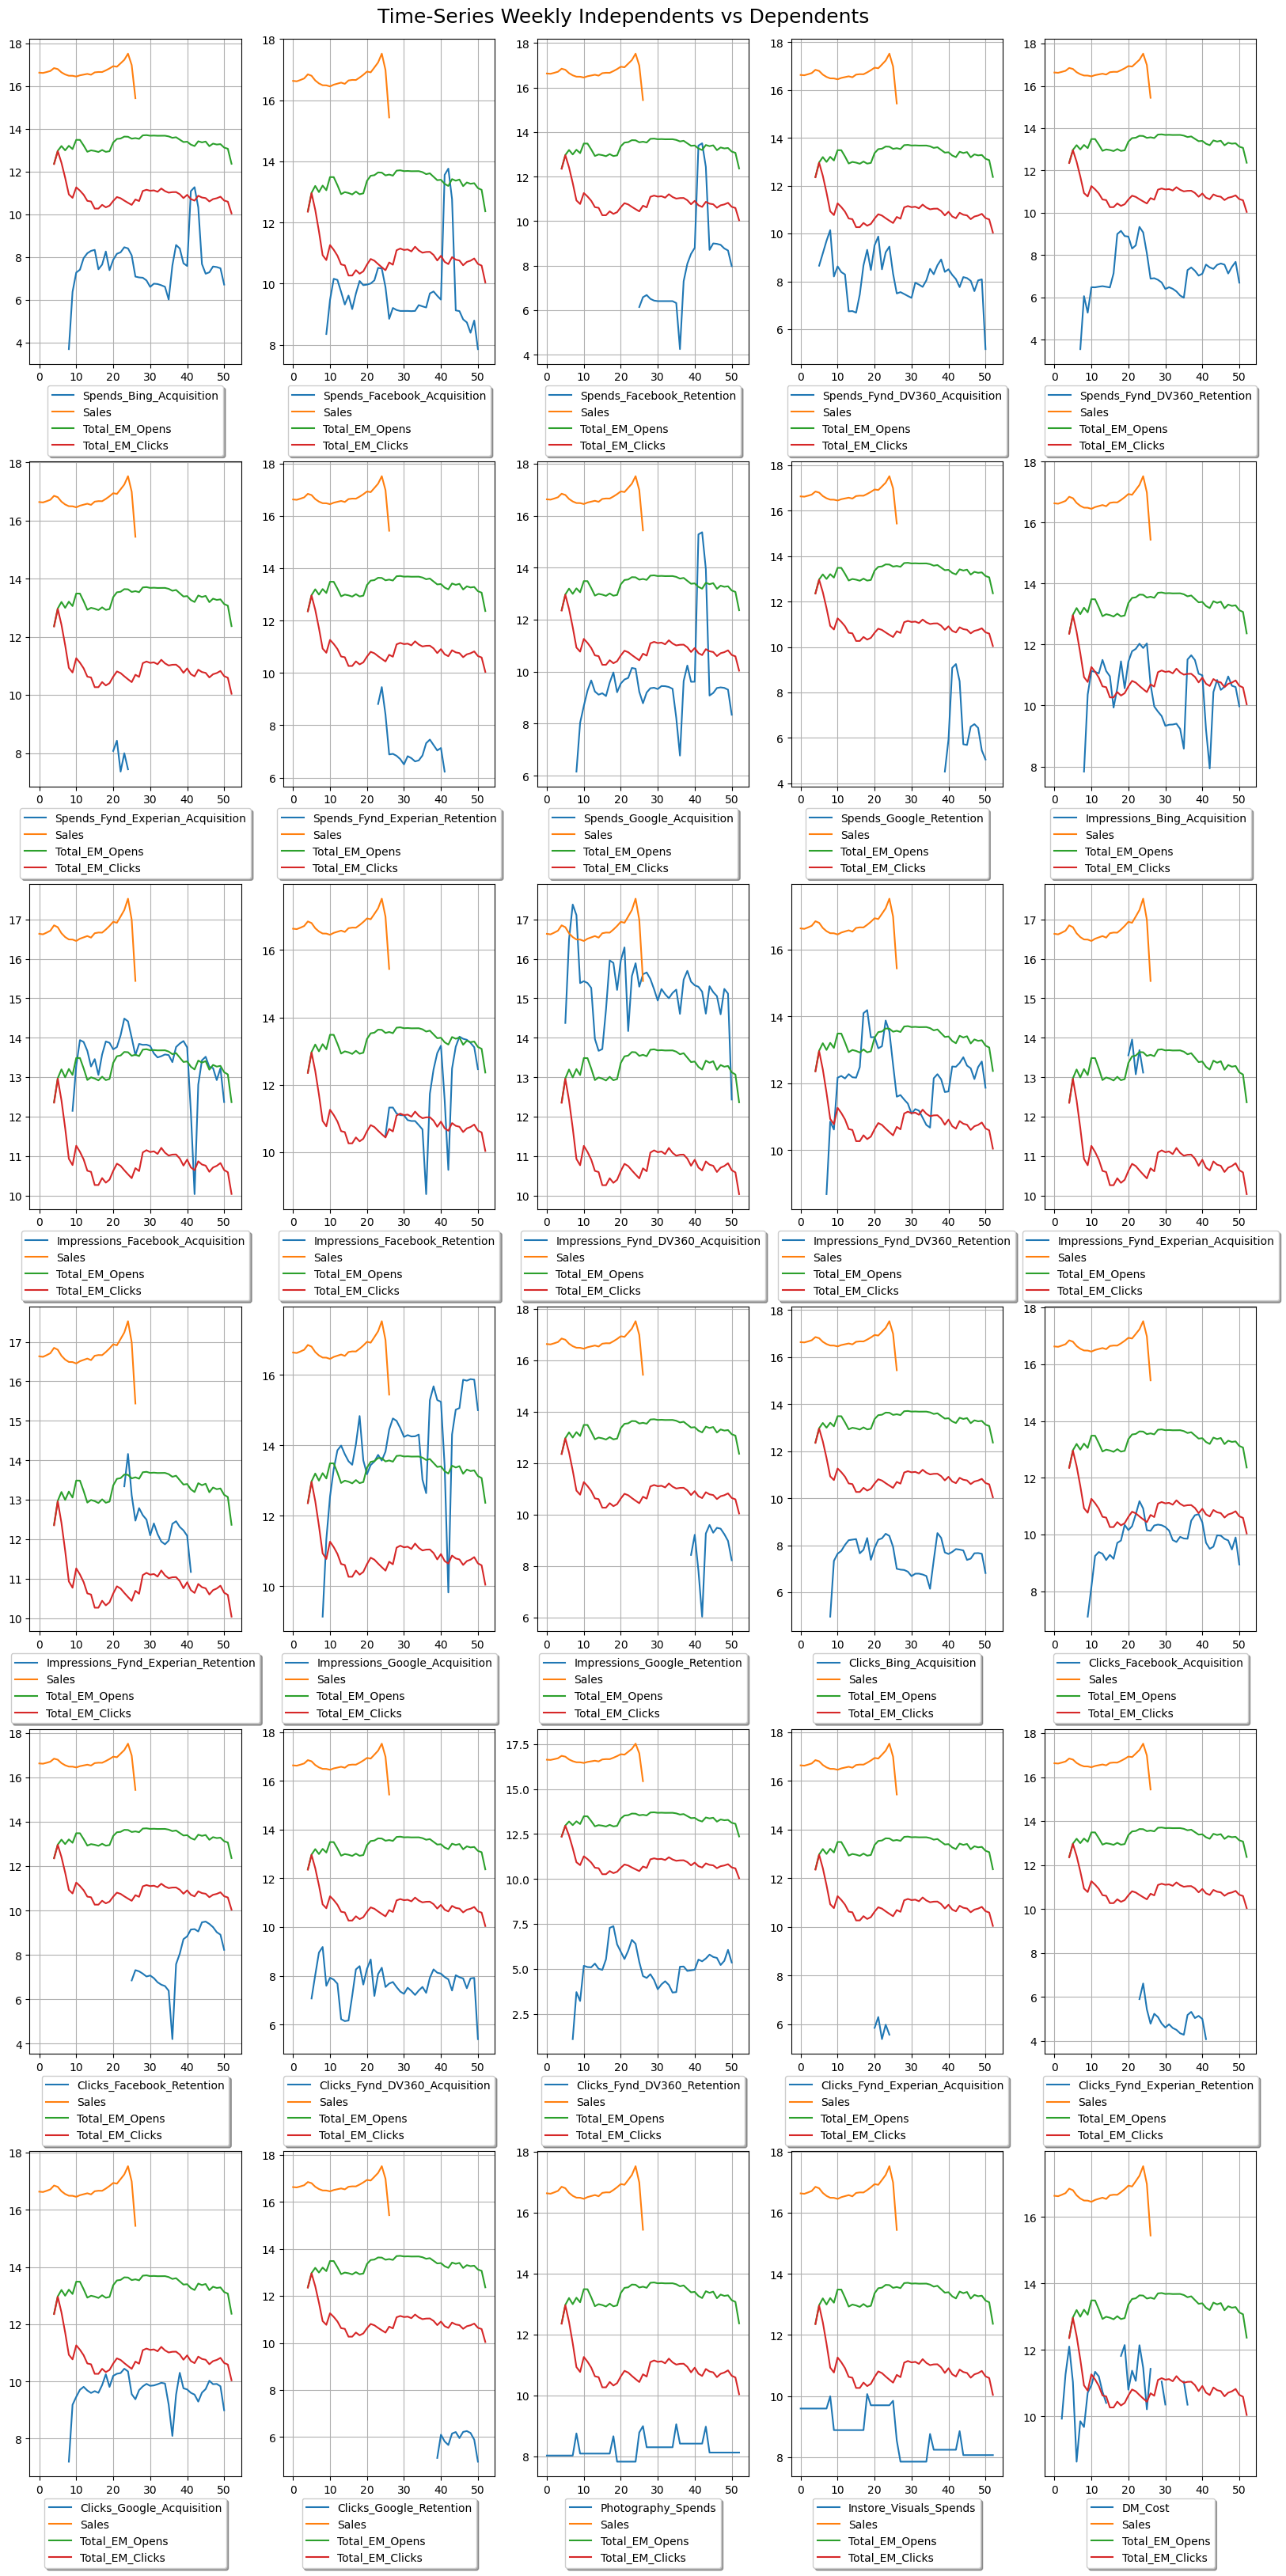

In [338]:
# Relationship Betweeen Variables
df_i=np.log(df).drop(["Year","Week"], axis=1)

# define subplot grid
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 40))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Time-Series Weekly Independents vs Dependents", fontsize=18, y=0.89)


for i, ax in zip(range(1,df_i.drop(['Sales','Total_EM_Opens','Total_EM_Clicks'],axis=1).shape[1]),axs.ravel()): 
        
    df_ii= pd.concat([pd.DataFrame(df_i.iloc[:,i]), df_i[['Sales','Total_EM_Opens','Total_EM_Clicks']]], axis=1)
    ts_plot= df_ii.plot(kind='line',ax=ax)
    ts_plot.grid()
    ts_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=1)
    
    

# TREATMENT FEATURES IN DATA

***SELECTING FEATURES WITH INFORMATION***

In [299]:
#Function to Select Variables with Information "APROX 70% OF TOTAL OBSERVATIONS WITH VALUES DIFFERENT TO ZERO"
df_ii= df.drop(["Year","Week"],axis=1).replace(0, pd.np.nan)
a=df_ii.count()
lista_var=pd.DataFrame(columns=['variable','contagem'])
for i in range(1,len(a)):
    if(a[i]>0.7*(df_ii.shape[0])):
        var=a.index[i]
        count=a[i]
        lista_var=lista_var.append({'variable':var,'contagem':count},ignore_index=True)



In [300]:
exog = ['Acquisition','Spends','EM_Send_Cost']
endog = ['Retention','Opens','Clicks']
lista_exog = lista_var['variable'][lista_var['variable'].str.split('_').str[2].isin(exog)]
lista_endog = lista_var['variable'][lista_var['variable'].str.split('_').str[2].isin(endog)]

df_exog=df_ii[list(lista_exog)]
df_endog=df_ii[list(lista_endog)]

#Data Modelagem
df_model = pd.concat([df_exog,df_endog], axis=1).dropna()

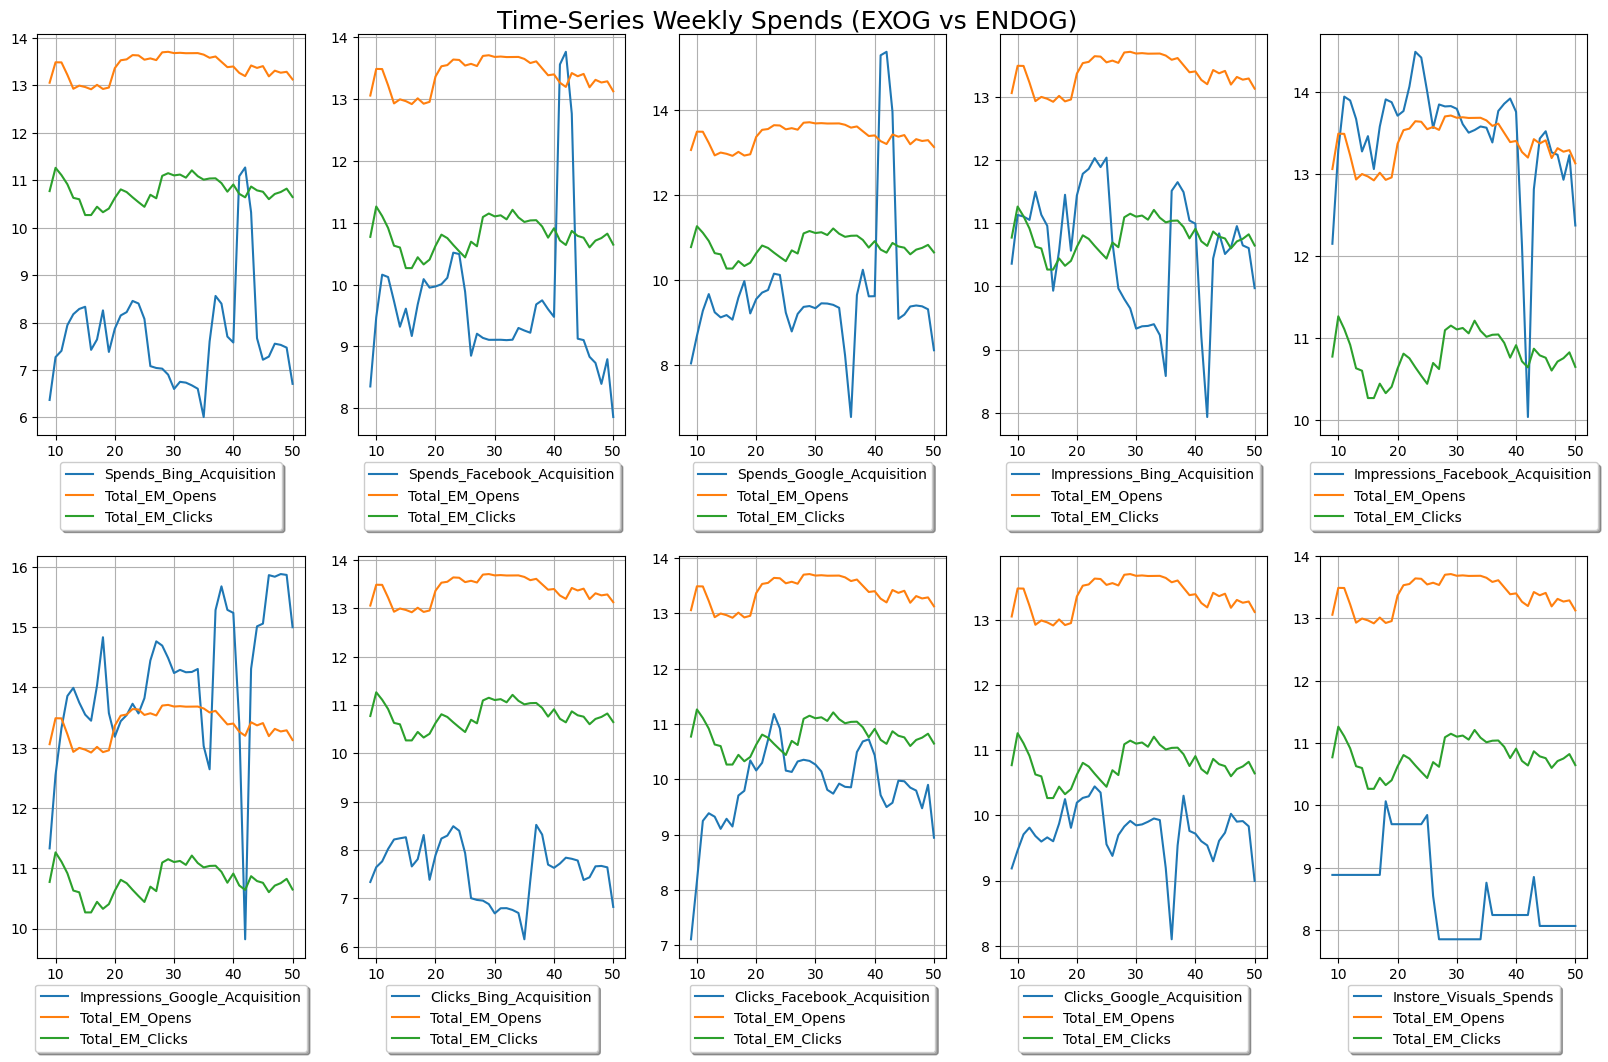

In [250]:
# Relationship Betweeen Variables - DATA MODELING
df_i=np.log(df_model.drop(list(lista_endog),axis=1))

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Time-Series Weekly Spends (EXOG vs ENDOG)", fontsize=18, y=0.9)

for i, ax in zip(range(0,df_i.shape[1]),axs.ravel()): 
        
    df_ii= pd.concat([pd.DataFrame(df_i.iloc[:,i]), np.log(df_model[list(lista_endog)])], axis=1)
    ts_plot= df_ii.plot(kind='line',ax=ax)
    ts_plot.grid()
    ts_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=1)

# MODELING***
***ARDL models (Auto Regressive Distribuited Lag Models)***

***lINEARITY Time Series Analysis - Methodoly to select variables***

In [307]:
# sample 70% - 30%
pc_70=int(np.floor(0.7*len(df_model)))

df_tno = df_model.iloc[0:pc_70]
df_oos = df_model.iloc[pc_70:len(df_i)]

In [376]:
#ARDL MODEL - identify lag of variables with linear significance

target = df_tno[list(lista_endog)[0]].reset_index(drop=True)
exog = df_tno[list(lista_exog)].reset_index(drop=True)

#fit one time to select optimize parameters
model = ARDL(target,1, exog, 1, causal=True)
#final model - Total_EM_Clicks
model = ARDL(target, [1], exog.drop(["Spends_Bing_Acquisition","Spends_Facebook_Acquisition","Spends_Google_Acquisition","Impressions_Facebook_Acquisition","Impressions_Google_Acquisition","Impressions_Bing_Acquisition","Clicks_Bing_Acquisition","Clicks_Facebook_Acquisition","Clicks_Google_Acquisition"],axis=1), {
                              "Instore_Visuals_Spends": [2] }, causal=True)
#                               "Instore_Visuals_Spends": [2] }, causal=True)
ardl_model = model.fit()
ardl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         Total_EM_Opens   No. Observations:                   29
Model:                     ARDL(1, 2)   Log Likelihood                -350.661
Method:               Conditional MLE   S.D. of innovations          66480.358
Date:                Sun, 01 Oct 2023   AIC                            709.322
Time:                        19:02:18   BIC                            714.650
Sample:                             2   HQIC                           710.951
                                   29                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2577.6666   6.45e+04     -0.040      0.968   -1.35e+05     1.3e+05
Total_EM_Opens.L1             0.9563      0.079     12.137      0.000       0.794       1.119
Instore_Visuals_Spends.L2     4.1580      2.320      1.792      0.085      -0.621       8.937
=============================================================================================
"""